In [1]:
import numpy as np
import pandas as pd

In [2]:
contextual_follower = pd.read_csv('plot_data/drone_game/contextual_follower.csv')
contextual_leader = pd.read_csv('plot_data/drone_game/contextual_leader.csv')
rl2_follower = pd.read_csv('plot_data/drone_game/rl2_follower_wandb.csv')
rl2_leader = pd.read_csv('plot_data/drone_game/rl2_leader.csv')
rl2_cont_follower = pd.read_csv('plot_data/drone_game/rl2_cont_follower_wandb.csv')
rl2_cont_leader = pd.read_csv('plot_data/drone_game/rl2_cont_leader.csv')

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode="same")
    return y_smooth

In [3]:
contextual_leader.head()

,Wall time,Step,Value
0,1.718920e+09,4096,0.55
1,1.718920e+09,8192,0.61
2,1.718920e+09,12288,0.55
3,1.718920e+09,14336,0.55
4,1.718920e+09,18432,0.54


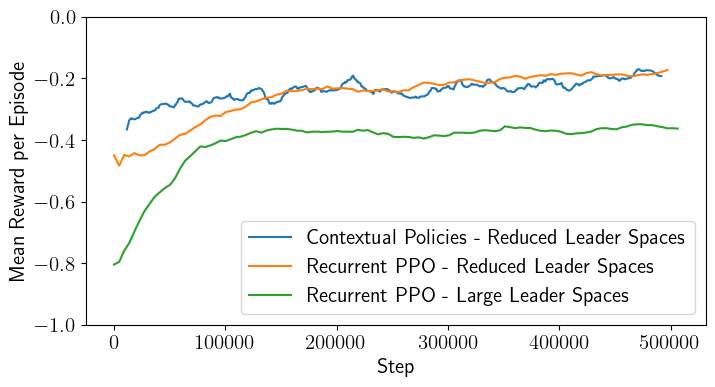

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# make text size of all labels larger
plt.rcParams.update({'font.size': 15})

# make font to latex style
plt.rc('text', usetex=True)

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(contextual_follower["Step"][20:-20], smooth(contextual_follower["Value"], 40)[20:-20], label='Contextual Policies - Reduced Leader Spaces')
plt.plot((rl2_follower["Step"]*57*80)[:110], (rl2_follower["ancient-yogurt-6 - mean meta-episode return"]/3)[:110], label='Recurrent PPO - Reduced Leader Spaces')
plt.plot((rl2_cont_follower["Step"]*57*80), rl2_cont_follower["smart-pyramid-7 - mean meta-episode return"]/3, label='Recurrent PPO - Large Leader Spaces')
# plt.plot(follower_rnn["Step"].to_numpy(), follower_rnn["celestial-elevator-24 - mean evaluation reward"].to_numpy(), label='Recurrent PPO (Ours)')

# Add labels and title
plt.xlabel('Step')
plt.ylabel('Mean Reward per Episode')
#plt.title('Follower Mean Reward')
plt.legend()

# put legend bottom right
plt.legend(loc='lower right')

# ylim
plt.ylim(-1., 0.)

# Display the plot
plt.show()


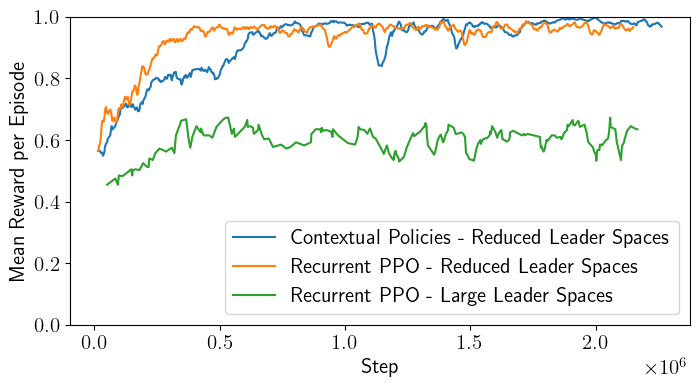

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# make text size of all labels larger
plt.rcParams.update({'font.size': 15})

# make font to latex style
plt.rc('text', usetex=True)

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(contextual_leader["Step"][5:750], smooth(contextual_leader["Value"], 10)[5:750], label='Contextual Policies - Reduced Leader Spaces')
plt.plot(rl2_leader["Step"][5:-5], smooth(rl2_leader["Value"], 10)[5:-5], label='Recurrent PPO - Reduced Leader Spaces')
plt.plot(rl2_cont_leader["Step"][2:220], smooth(rl2_cont_leader["Value"], 4)[2:220], label='Recurrent PPO - Large Leader Spaces')

# Add labels and title
plt.xlabel('Step')
plt.ylabel('Mean Reward per Episode')
#plt.title('Leader Mean Reward')
plt.legend()

# ylim
plt.ylim(0, 1.0)

# put legend bottom right
plt.legend(loc='lower right')

# Display the plot
plt.show()
